In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rbf_image = cv2.imread('image.png')

In [3]:
print("shape of image: {0}".format(rbf_image.shape))

shape of image: (288, 512, 3)


In [4]:
def image_write(img, image_name):
    cv2.imwrite(image_name, img)

### Gray scaling an image

In [5]:
def grey_scale_conv(img):
    # gray = 0.2989*red + 0.5870*green + 0.1140*blue
    gray_scale = np.dot(img, np.array([0.2989, 0.5870, 0.1140]))
    return gray_scale

In [6]:
gray_scale_img = grey_scale_conv(rbf_image)

In [7]:
print("shape of scaled image: {0}".format(gray_scale_img.shape))

shape of scaled image: (288, 512)


In [8]:
image_write(gray_scale_img, 'gray_image.png')

### Scaling

In [9]:
def scaling(img):
    #Selecting alternate rows and columns
    scaled_img = img[::2,::2]
    return scaled_img

In [10]:
scaled_img = scaling(gray_scale_img)

In [11]:
image_write(scaled_img, "gray_image_scaled.png")

### Translating

In [12]:
def translating(img):
    translate_image = np.full_like(img, 255)
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            try:
                translate_image[row+50, col+50] = img[row, col]
            except IndexError:
                break
    
    return translate_image 

In [13]:
translate_image = translating(gray_scale_img)

In [14]:
image_write(translate_image, "gray_image_translated.png")

#### Flip Horizontal

In [15]:
def flip_horizontal(img):
    hor_flipped = np.full_like(img, 0)
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            hor_flipped[img.shape[0]-1-row,col] = img[row, col]
    return hor_flipped

In [16]:
hor_flipped_image = flip_horizontal(gray_scale_img)

In [17]:
image_write(hor_flipped_image, "gray_image_flip_horizontal.png")

### Flip Verticle

In [18]:
def flip_verticle(img):
    ver_flipped = np.full_like(img, 0)
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            ver_flipped[row,img.shape[1]-1-col] = img[row, col]
    return ver_flipped

In [19]:
ver_flipped_image = flip_verticle(gray_scale_img)

In [20]:
image_write(ver_flipped_image, "gray_image_flip_vertical.png")

### Inversion

In [21]:
def inversion(img):
    inv_image = np.full_like(img, 0)
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            inv_image[row,col] = 255-img[row, col]
    return inv_image

In [22]:
inv_image = inversion(gray_scale_img)

In [23]:
image_write(inv_image, "gray_image_inversion.png")

### Rotation

In [100]:
def rotation(img):
    rot_image = np.full_like(img, 0)
    
    angle = np.radians(45)
    
    # Center of image in coordinate axis
    
    x_center = -int(img.shape[1]/2)
    y_center = -int(img.shape[0]/2)
    
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            
            new_x = int((col+x_center)*np.cos(angle) - (row+y_center)*np.sin(angle)) - x_center
            new_y = int((col+x_center)*np.sin(angle) + (row+y_center)*np.cos(angle)) - y_center
            
            if 0 <= new_x < img.shape[1] and 0 <= new_y < img.shape[0]:
                rot_image[new_y,new_x] = img[row, col]
    return rot_image

In [101]:
rot_image = rotation(gray_scale_img)

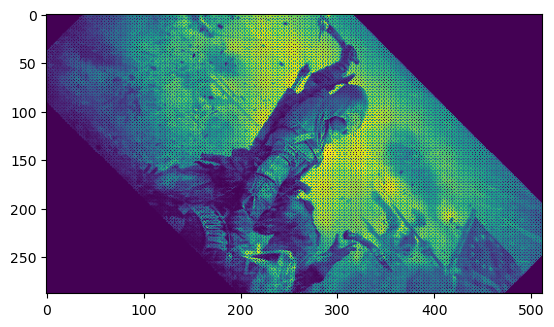

In [102]:
plt.imshow(rot_image)

In [27]:
image_write(rot_image, "gray_image_rotated.png")

## Bonus

#### Scaling

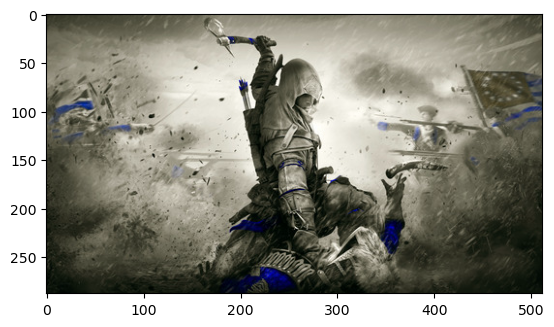

In [9]:
plt.imshow(rbf_image)

In [10]:
def bonus_rbf_scaling(img):
    #Selecting alternate rows and columns
    scaled_img = img[::2,::2]
    return scaled_img

In [11]:
scaled_img_rbf = bonus_rbf_scaling(rbf_image)

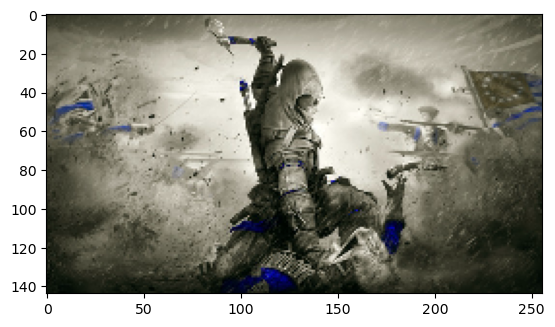

In [12]:
plt.imshow(scaled_img_rbf)

In [30]:
image_write(scaled_img_rbf, "image_scaled.png")

#### Translating

In [31]:
def bonus_rbf_translating(img):
    translate_image = np.full_like(img, 255)
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            try:
                translate_image[row+50, col+50] = img[row, col]
            except IndexError:
                break
    
    return translate_image

In [32]:
translating_img_rbf = bonus_rbf_translating(rbf_image)

In [33]:
image_write(translating_img_rbf, "image_translated.png")

#### Horizantal Flip

In [34]:
def flip_horizontal_rbf(img):
    hor_flipped = np.full_like(img, 0)
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            hor_flipped[img.shape[0]-1-row,col] = img[row, col]
            
    return hor_flipped

In [35]:
hor_flip_img_rbf = flip_horizontal_rbf(rbf_image)

In [36]:
image_write(hor_flip_img_rbf, "image_flip_horizontal.png")

#### Verticle Flip

In [37]:
def flip_verticle_rbf(img):
    ver_flipped = np.full_like(img, 0)
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            ver_flipped[row,img.shape[1]-1-col] = img[row, col]
    return ver_flipped

In [38]:
ver_flipped_image_rbf = flip_verticle_rbf(rbf_image)

In [39]:
image_write(ver_flipped_image_rbf, "image_flip_vertical.png")

#### Written

In [40]:
import numpy as np

In [41]:
rot = np.array([[np.cos(np.radians(30)), -np.sin(np.radians(30)), 0], [np.sin(np.radians(30)), np.cos(np.radians(30)), 0], [0,0,1]])

In [42]:
tra = np.array([[1,0,-10],[0,1,-20], [0,0,1]])

In [43]:
np.matmul(rot,tra)

array([[  0.8660254 ,  -0.5       ,   1.33974596],
       [  0.5       ,   0.8660254 , -22.32050808],
       [  0.        ,   0.        ,   1.        ]])

In [44]:
rot

array([[ 0.8660254, -0.5      ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [45]:
np.matmul(rot,tra)

array([[  0.8660254 ,  -0.5       ,   1.33974596],
       [  0.5       ,   0.8660254 , -22.32050808],
       [  0.        ,   0.        ,   1.        ]])

In [46]:
np.cos(np.radians(180))

-1.0

In [47]:
np.sin(np.radians(180))

1.2246467991473532e-16

In [48]:
np.array([[np.cos(np.radians(180)), -np.sin(np.radians(180)), 0], [np.sin(np.radians(180)), np.cos(np.radians(180)), 0], [0,0,1]])

array([[-1.0000000e+00, -1.2246468e-16,  0.0000000e+00],
       [ 1.2246468e-16, -1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [49]:
import numpy as np

# R1: Rotate π (180 degrees) around the X-axis
R1 = np.array([[1, 0, 0],
               [0, -1, 0],
               [0, 0, -1]])

# R2: Rotate π/2 (90 degrees) around the Z-axis
R2 = np.array([[0, -1, 0],
               [1, 0, 0],
               [0, 0, 1]])

# Combined transformation R2 * R1
R_combined = np.dot(R2, R1)

print("R1:")
print(R1)

print("\nR2:")
print(R2)

print("\nCombined Transformation R2 * R1:")
print(R_combined)


R1:
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]

R2:
[[ 0 -1  0]
 [ 1  0  0]
 [ 0  0  1]]

Combined Transformation R2 * R1:
[[ 0  1  0]
 [ 1  0  0]
 [ 0  0 -1]]


In [50]:
A = np.array([10,0,20])

In [51]:
B = np.dot(R_combined,A)
B

array([  0,  10, -20])

In [52]:
np.dot(np.linalg.inv(R_combined),B)

array([10.,  0., 20.])

In [53]:
np.linalg.inv(R_combined)

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [-0., -0., -1.]])

In [54]:
R_combined.T

array([[ 0,  1,  0],
       [ 1,  0,  0],
       [ 0,  0, -1]])

In [55]:
import numpy as np
row = 256
col=512
angle = np.radians(-45)
new_x = int(np.ceil(row*np.cos(angle) - col*np.sin(angle)))
new_y = int(np.ceil(row*np.sin(angle) + col*np.cos(angle)))

In [56]:
new_x

544

In [60]:
int(3/2)

1

In [62]:
5//3

1